### Corrective RAG (CRAG)

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [3]:
from langchain import hub # 랭체인의 허브 기능으로 사전 정의된 체인, 도구, 프롬프트 등을 사용

prompt = hub.pull("rlm/rag-prompt")

generation_chain = prompt | llm

In [4]:
from langchain_community.document_loaders import WebBaseLoader # 웹에서 데이터를 가져옵니다

urls = [
    "https://www.promptingguide.ai/kr",
    "https://www.promptingguide.ai/kr/introduction/basics",
] # 텍스트 데이터를 가져올 웹 페이지의 URL 목록

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist] # 중첩된 리스트(List of Lists)를 단일(Flat) 리스트로 평탄화(Flattening)하는 기능

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
docs

[[Document(metadata={'source': 'https://www.promptingguide.ai/kr', 'title': '프롬프트 엔지니어링 가이드 | Prompt Engineering Guide<!-- --> ', 'language': 'kr'}, page_content="프롬프트 엔지니어링 가이드 | Prompt Engineering Guide<!-- --> 🚀 Master Prompt Engineering and building AI Agents in our NEW courses! Use PROMPTING20 for 20% off ➜ Enroll nowPrompt Engineering GuideAboutAboutGitHubGitHub (opens in a new tab)DiscordDiscord (opens in a new tab)Prompt EngineeringIntroductionLLM 설정프롬프트의 기초프롬프트의 구성 요소프롬프트 설계에 관한 일반적인 팁프롬프트 예시TechniquesZero-shot PromptingFew-shot PromptingChain-of-Thought PromptingSelf-ConsistencyGenerate Knowledge PromptingPrompt ChainingTree of ThoughtsRetrieval Augmented GenerationAutomatic Reasoning and Tool-useAutomatic Prompt EngineerActive-PromptDirectional Stimulus PromptingProgram-Aided Language ModelsReActReflexionMultimodal CoTGraph Promptingmeta-promptingApplications데이터 생성코드 생성학위가 필요한 직업을 분류한 사례 연구프롬프트 함수Function Callingcontext-cachingfinetuning-gpt4ogenerating_textbookssynthetic_ra

In [6]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 문서 분할
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=0,
)
doc_splits = text_splitter.split_documents(docs_list)

In [7]:
doc_splits

[Document(metadata={'source': 'https://www.promptingguide.ai/kr', 'title': '프롬프트 엔지니어링 가이드 | Prompt Engineering Guide<!-- --> ', 'language': 'kr'}, page_content='프롬프트 엔지니어링 가이드 | Prompt Engineering Guide<!-- --> 🚀 Master Prompt Engineering and building AI Agents in our NEW courses! Use PROMPTING20 for 20% off ➜ Enroll nowPrompt Engineering GuideAboutAboutGitHubGitHub (opens in a new tab)DiscordDiscord (opens in a new tab)Prompt EngineeringIntroductionLLM 설정프롬프트의 기초프롬프트의 구성 요소프롬프트 설계에 관한 일반적인 팁프롬프트 예시TechniquesZero-shot PromptingFew-shot PromptingChain-of-Thought PromptingSelf-ConsistencyGenerate Knowledge PromptingPrompt ChainingTree of ThoughtsRetrieval Augmented'),
 Document(metadata={'source': 'https://www.promptingguide.ai/kr', 'title': '프롬프트 엔지니어링 가이드 | Prompt Engineering Guide<!-- --> ', 'language': 'kr'}, page_content='GenerationAutomatic Reasoning and Tool-useAutomatic Prompt EngineerActive-PromptDirectional Stimulus PromptingProgram-Aided Language ModelsReActReflexionMultimoda

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv
load_dotenv()

# 임베딩 모델 준비
embedding_model = GoogleGenerativeAIEmbeddings(
    model="gemini-embedding-001",
)

In [9]:
from langchain_community.vectorstores import FAISS

# FAISS 벡터스토어 생성 및 저장
vectorstore = FAISS.from_documents(doc_splits, embedding_model)
vectorstore.save_local("faiss_web")

# 벡터스토어 재로딩
vectorstore = FAISS.load_local(
    "faiss_web",
    embedding_model,
    allow_dangerous_deserialization=True, # 완전히 신뢰할 수 있는 경우(자신이 직접 저장한 파일)에만 매우 신중하게 사용
)

In [10]:

# retriever = vectorstore.as_retriever(search_kwargs={"k": 2}) # 벡터 저장소를 검색할 수 있는 검색기(retriever) 생성
retriever = vectorstore.as_retriever()

In [13]:
retriever.invoke("기초 프롬프트")

[Document(id='c94e64e1-b46d-4984-acf5-bd6584621ad2', metadata={'source': 'https://www.promptingguide.ai/kr/introduction/basics', 'title': '프롬프트의 기초 | Prompt Engineering Guide<!-- --> ', 'language': 'kr'}, page_content='프롬프트의 기초 | Prompt Engineering Guide<!-- --> 🚀 Master Prompt Engineering and building AI Agents in our NEW courses! Use PROMPTING20 for 20% off ➜ Enroll nowPrompt Engineering GuideAboutAboutGitHubGitHub (opens in a new tab)DiscordDiscord (opens in a new tab)Prompt EngineeringIntroductionLLM 설정프롬프트의 기초프롬프트의 구성 요소프롬프트 설계에 관한 일반적인 팁프롬프트 예시TechniquesZero-shot PromptingFew-shot PromptingChain-of-Thought PromptingSelf-ConsistencyGenerate Knowledge PromptingPrompt ChainingTree of ThoughtsRetrieval Augmented'),
 Document(id='b70453e7-b3de-41fe-aa49-71cb736f6fa4', metadata={'source': 'https://www.promptingguide.ai/kr/introduction/basics', 'title': '프롬프트의 기초 | Prompt Engineering Guide<!-- --> ', 'language': 'kr'}, page_content='기초 프롬프트\n간단한 프롬프트만으로도 많은 일들을 할 수 있지만, 제공하는 정보의 양과 퀄리티에

In [14]:
from typing_extensions import TypedDict # 딕셔너리의 구조와 데이터 타입을 명시적으로 정의
from typing import List

class GraphState(TypedDict): # 데이터의 상태를 표현한 딕셔너리 구조
    question : str
    generation : str
    web_search : str
    documents : List[str] # 문서 데이터를 문자열의 리스트로 저장

In [15]:
from typing import Any, Dict

def retrieve(state: GraphState) -> Dict[str, Any]: # 질문과 검색된 문서가 포함된 딕셔너리를 반환
    print("---검색---")
    question = state["question"]

    documents = retriever.invoke(question) # retriever를 사용하여 저장소에서 관련 문서를 검색
    return {"documents": documents, "question": question}

In [16]:
from langchain.prompts import PromptTemplate # LLM에 제공할 프롬프트를 템플릿 형식으로 정의
from langchain_core.output_parsers import JsonOutputParser # LLM에서 생성된 출력값을 JSON 형식으로 파싱
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> 당신은 사용자의 질문과 검색된 문서의 관련성을 평가하는 봇입니다. 문서에 사용자의 질문과 관련된 키워드가 포함되어 있다면, 이를 관련성이 있다고 평가하세요.
문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'의 점수를 부여하세요.
점수는 'score'라는 단일 키를 포함하는 JSON 형식으로 제공하되 추가 설명이나 서문 없이 작성하세요.
     <|eot_id|><|start_header_id|>user<|end_header_id|>
    여기에 검색된 문서가 있습니다: \n\n {document} \n\n
    여기에 사용자 질문이 있습니다: {question} \n <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question", "document"],
) # LLM이 작업을 수행하기 위한 지침

retrieval_grader = prompt | llm | JsonOutputParser()

In [17]:
def relevant_documents(state: GraphState) -> Dict[str, Any]:
    print("---문서가 질문과 관련이 있는지 확인하세요---")
    question = state["question"]
    documents = state["documents"]

    filtered_docs = []
    web_search = False
    for d in documents:
        score = retrieval_grader.invoke({"question": question, "document": d.page_content}) # retrieval_grader를 호출하여 질문(question)과 문서의 텍스트(d.page_content) 간 관련성을 평가
        grade = score['score']
        if grade.lower() == "yes": # 문서 필터
            print("---평가: 관련 있음---")
            filtered_docs.append(d)
        else:
            print("---평가: 관련 없음---")

    if len(filtered_docs) == 0: # 웹 검색 여부 결정
        web_search = True

    return {"documents": filtered_docs, "question": question, "web_search": web_search}

In [30]:
from langchain_core.tools import tool
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults 

@tool
def get_web_search(query: str, search_period: str='w') -> str:
    """
    웹 검색을 수행하는 함수.

    Args:
        query (str): 검색어
        search_period (str): 검색 기간 (e.g., "w" for past week (default), "m" for past month, "y" for past year, "d" for past day)

    Returns:
        str: 검색 결과
    """
    wrapper = DuckDuckGoSearchAPIWrapper(
        region="kr-kr",
        time=search_period
    )

    print('\n----- WEB SEARCH -----')
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        source="news",
        results_separator=';\n'
    )

    searched = search.invoke(query)
    
    for i, result in enumerate(searched.split(';\n')):
        print(f'{i+1}. {result}')
    
    return searched

In [31]:
result = get_web_search.invoke("빌보드 차트 1위 곡?")


----- WEB SEARCH -----
빌보드 차트 1위 곡?
w
1. snippet: 《 빌보드 》 자체가 영미권 음악 문화를 강하게 반영하는 차트다보니, 영미권 가수들이 차트를 휩쓰는 경우가 압도적인 편이다. 핫 100 차트에서 1위를 가장 많이 차지한 가수는 비틀즈이다., title: 빌보드 핫 100 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/빌보드_핫_100
2. snippet: 빌보드 로고 빌보드 로고 흰색.[1] 1978년 연말 차트 1 위곡은 이미 1977년에 1위를 달성했다. Earth, Wind & Fire - Serpentine Fire. 크리에이티브 커먼즈 라이선스 이 저작물은 CC BY-NC-SA 2.0 KR에 따라 이용할 수 있습니다., title: 빌보드 R&B 차트 /1970년대 1 위 곡 - 나무위키, link: https://namu.wiki/w/빌보드+R&B+차트/1970년대+1위+곡
3. snippet: 빌보드 로고 빌보드 로고 흰색 빌보드 얼터너티브 송 차트 1 위 곡 자료., title: 빌보드 얼터너티브 송 차트 /1990년대 1위곡 - 나무위키, link: https://namu.wiki/w/빌보드+얼터너티브+송+차트/1990년대+1위곡
4. snippet: 빌보드 얼터너티브 송 1 위 곡 . 올타임 아티스트. 빌보드 어덜트 컨템퍼러리 차트 1 위 노래., title: 빌보드 R&B 차트 /1958년~1960년대 1 위 곡, link: https://thewiki.kr/w/빌보드+R&B+차트/1958년~1960년대+1위+곡


In [32]:
result

'snippet: 《 빌보드 》 자체가 영미권 음악 문화를 강하게 반영하는 차트다보니, 영미권 가수들이 차트를 휩쓰는 경우가 압도적인 편이다. 핫 100 차트에서 1위를 가장 많이 차지한 가수는 비틀즈이다., title: 빌보드 핫 100 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/빌보드_핫_100;\nsnippet: 빌보드 로고 빌보드 로고 흰색.[1] 1978년 연말 차트 1 위곡은 이미 1977년에 1위를 달성했다. Earth, Wind & Fire - Serpentine Fire. 크리에이티브 커먼즈 라이선스 이 저작물은 CC BY-NC-SA 2.0 KR에 따라 이용할 수 있습니다., title: 빌보드 R&B 차트 /1970년대 1 위 곡 - 나무위키, link: https://namu.wiki/w/빌보드+R&B+차트/1970년대+1위+곡;\nsnippet: 빌보드 로고 빌보드 로고 흰색 빌보드 얼터너티브 송 차트 1 위 곡 자료., title: 빌보드 얼터너티브 송 차트 /1990년대 1위곡 - 나무위키, link: https://namu.wiki/w/빌보드+얼터너티브+송+차트/1990년대+1위곡;\nsnippet: 빌보드 얼터너티브 송 1 위 곡 . 올타임 아티스트. 빌보드 어덜트 컨템퍼러리 차트 1 위 노래., title: 빌보드 R&B 차트 /1958년~1960년대 1 위 곡, link: https://thewiki.kr/w/빌보드+R&B+차트/1958년~1960년대+1위+곡'

In [33]:
from langchain.schema import Document

def websearch(state: GraphState) -> Dict[str, Any]: # 검색된 문서와 질문을 포함하는 딕셔너리를 반환
    print("---웹에서 검색---")
    question = state["question"]
    documents = state["documents"] # 현재 상태에서 관리 중인 문서 리스트를 가져옵니다

    web_results = get_web_search.invoke({"query": question}) # 검색 도구 호출
    # web_results = Document(page_content=web_results) # 검색 결과 처리
    if documents is not None: # 기존 문서 리스트(documents)가 있으면 새로 생성된 검색 결과(web_results)를 추가
        documents.append(web_results)
    else:
        documents = [web_results]
    return {"documents": documents, "question": question}

In [34]:
def write(state: GraphState) -> Dict[str, Any]: # 현재 상태(GraphState)에서 질문과 문서를 추출
    print("---답변 생성---")
    question = state["question"]
    documents = state["documents"]

    generation = generation_chain.invoke({"context": documents, "question": question}) # generation_chain을 호출하여 문서(context)와 질문(question)을 입력으로 답변 생성
    return {"documents": documents, "question": question, "generation": generation}

In [35]:
RETRIEVE = "retrieve" # 데이터를 검색
RELEVANT_DOCUMENTS = "relevant_documents" # 검색된 문서를 평가
WRITE = "write"
WEBSEARCH = "websearch"

In [36]:
def decide_to_write(state):
    print("---문서 검토---")

    if state["web_search"]: # 웹 검색 여부 판단
        print(
            "---decide: 모든 문서가 질문과 관련이 있는 것은 아니므로 웹 검색을 포함합니다---"
        )
        return WEBSEARCH
    else:
        print("---write: 답변을 생성합니다---")
        return WRITE

In [37]:
from langgraph.graph import END, StateGraph
workflow = StateGraph(GraphState)

# 노드 이름과 연결된 함수를 매핑
workflow.add_node(RETRIEVE, retrieve) # 문서 검색에는 retrieve 함수 실행
workflow.add_node(RELEVANT_DOCUMENTS, relevant_documents)
workflow.add_node(WRITE, write)
workflow.add_node(WEBSEARCH, websearch)

workflow.set_entry_point(RETRIEVE) # 워크플로우의 시작 노드를 설정
workflow.add_edge(RETRIEVE, RELEVANT_DOCUMENTS) # RETRIEVE → RELEVANT_DOCUMENTS: 검색된 문서를 평가하는 단계로 전환
workflow.add_conditional_edges(
    RELEVANT_DOCUMENTS, # 출발 노드
    decide_to_write, # 조건부 상태 전이
    {
        WEBSEARCH: WEBSEARCH, # 추가 검색 필요 시 WEBSEARCH로 이동
        WRITE: WRITE, # 문서 평가 결과가 충분하면 WRITE로 이동
    },
)
workflow.add_edge(WEBSEARCH, WRITE)
workflow.add_edge(WRITE, END) # 작업 종료

app = workflow.compile() # 정의된 워크플로우를 컴파일하여 실행 가능한 상태로 만듭니다

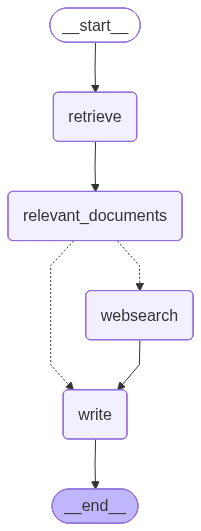

In [38]:

from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png())) # 정의된 워크플로우(app)의 그래프를 가져와 PNG 이미지로 변환
except Exception:
    pass

In [39]:
from pprint import pprint
inputs = {"question": "프롬프트 엔지니어링이란?"} # 워크폴로우 실행에 필요한 입력 데이터
for output in app.stream(inputs): # 스트리밍 방식으로 결과를 생성
    for key, value in output.items():
        pprint(f"Finished running: {key}:")
pprint(value["generation"])

---검색---
'Finished running: retrieve:'
---문서가 질문과 관련이 있는지 확인하세요---
---평가: 관련 있음---
---평가: 관련 있음---
---평가: 관련 있음---
---평가: 관련 있음---
---문서 검토---
---write: 답변을 생성합니다---
'Finished running: relevant_documents:'
---답변 생성---
'Finished running: write:'
AIMessage(content='프롬프트 엔지니어링은 언어 모델(LM)을 효율적으로 활용하기 위해 프롬프트를 개발하고 최적화하는 비교적 새로운 분야입니다. 이는 LLM과 상호 작용하고 개발하는 데 유용한 다양한 기술과 기법을 포함합니다. 이 기술은 LLM의 기능과 한계를 이해하고, 안전성을 개선하며, 새로운 기능을 구축하는 데 중요한 역할을 합니다.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--b5778b61-47fb-48ce-8810-e96107778608-0', usage_metadata={'input_tokens': 1027, 'output_tokens': 753, 'total_tokens': 1780, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 667}})


In [40]:
from pprint import pprint
inputs = {"question": "KT 소액결제 해킹사건의 원인은?"} # 워크폴로우 실행에 필요한 입력 데이터
for output in app.stream(inputs): # 스트리밍 방식으로 결과를 생성
    for key, value in output.items():
        pprint(f"Finished running: {key}:")
pprint(value["generation"])

---검색---
'Finished running: retrieve:'
---문서가 질문과 관련이 있는지 확인하세요---
---평가: 관련 없음---
---평가: 관련 없음---
---평가: 관련 없음---
---평가: 관련 없음---
---문서 검토---
---decide: 모든 문서가 질문과 관련이 있는 것은 아니므로 웹 검색을 포함합니다---
'Finished running: relevant_documents:'
---웹에서 검색---

----- WEB SEARCH -----
KT 소액결제 해킹사건의 원인은?
w
1. snippet: 원본 이미지 보기 경기 부천에서도 KT 소액결제 피해 5건‥411만 원 빠져나가. 경기 광명시와 서울 금천구에서 KT 고객 수십 명이 휴대전화 소액결제 피해를 당한 가운데, 경기 부천시에서도 유사한 피해가 잇따랐습니다., title: 경기 부천에서도 KT 소액결제 피해 5건‥411만 원 빠져나가 | MBC 뉴스, link: https://imnews.imbc.com/news/2025/society/article/6753928_36718.html
2. snippet: KT 무단 소액결제 사고가 최초 제보가 있기 20여 일 전인 8월 초 이미 발생했던 것으로 드러났다., title: KT , 소액결제 피해 한달 늑장 차단했다｜동아일보, link: https://www.donga.com/news/article/all/20250918/132411861/2
3. snippet: (서울=연합뉴스) 이동해 기자 = 김영섭 KT 사장이 11일 서울 종로구 KT 광화문빌딩 웨스트 사옥에서 소액결제 피해와 관련해 고개 숙여 사과하고 있다. 2025.9.11 [공동취재] eastsea@yna.co.kr., title: ' KT 소액결제 ' 사건 40대 중국교포 용의자 2명 검거(종합) | 연합뉴스, link: https://www.yna.co.kr/view/AKR20250917145452061
4. snippet: KT 소액결제 해킹 추정 피해